# Vertical Cross-Sectional Views

We performed two JAX-ALFA simulations with grids: (i) 64x64x64, and (ii) 128x128x128. The computations use double precision on an NVIDIA A6000-Ada GPU. 

**Load the necessary packages**

In [10]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

**Input & Output Directories**

In [11]:
# User: please change these paths according to your directory structure
BaseDir   = ('/Users/sukantabasu/Dropbox/Codes/LES/JAX-ALFA/JAXALFA0.1/')

# 64x64x64 run
CaseDir1   = os.path.join(BaseDir, 'examples/NBL_A94/runs/64x64x64/')
OutputDir1 = os.path.join(CaseDir1, 'output/') 

# 128x128x128 run
CaseDir2   = os.path.join(BaseDir, 'examples/NBL_A94/runs/128x128x128/')
OutputDir2 = os.path.join(CaseDir2, 'output/') 

**Load 3D fields from T = 27 h**

In [12]:
# 64x64x64 run
OutputFiles1 = os.path.join(OutputDir1, 'ALFA_3DFields_Iteration_97200.npz')
File3D_1 = np.load(OutputFiles1)
u3D_1 = File3D_1['u']

# 128x128x128 run
OutputFiles2 = os.path.join(OutputDir2, 'ALFA_3DFields_Iteration_194400.npz')
File3D_2 = np.load(OutputFiles2)
u3D_2 = File3D_2['u']

**Input Information from the Config File**

In [13]:
# Common settings across the simulations
l_x = 4000 # domain length (m)
l_y = 4000 # domain width (m)
l_z = 1500 # domain height (m)
SimTime = 100000  # total simulation time (sec)
OutputInterval = 60 # frequency of output (sec)

In [14]:
# Simulation 1
nx_1 = 64 # number of grid points in x direction
ny_1 = 64 # number of grid points in y direction
nz_1 = 64 # number of grid points in z direction
dx_1 = l_x / nx_1
dy_1 = l_y / ny_1
dz_1 = l_z / (nz_1 - 1)
x_axis_1 = dx_1 * np.arange(nx_1)

# Simulation 2
nx_2 = 128 # number of grid points in x direction
ny_2 = 128 # number of grid points in y direction
nz_2 = 128 # number of grid points in z direction
dx_2 = l_x / nx_2
dy_2 = l_y / ny_2
dz_2 = l_z / (nz_2 - 1)
x_axis_2 = dx_2 * np.arange(nx_2)

**Derived Variables**

In [15]:
# Half levels for u, v, TH variables
z_u_1 = np.array([(k + 0.5) * l_z / (nz_1 - 1) for k in range(nz_1)])
z_u_2 = np.array([(k + 0.5) * l_z / (nz_2 - 1) for k in range(nz_2)])

**Plot vertical cross-section of longitudinal velocity fields: 64x64x64 run**

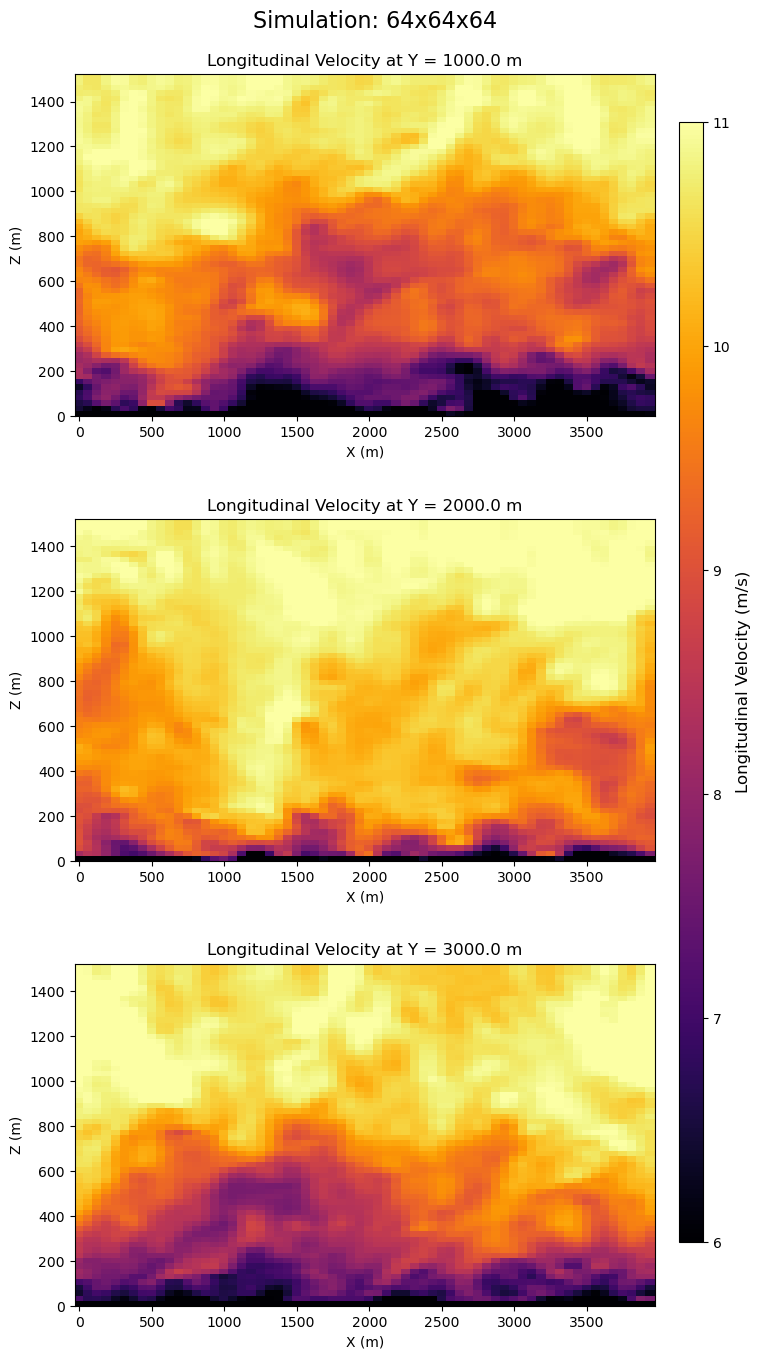

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(8, 16))  

# Selected cross-sections at 0.25*l_y, 0.5*l_y, and 0.75*l_y 
j_levels = [int(ny_1/4), int(ny_1/2), int(ny_1*3/4)]  

# Colorbar range
vmin = 6
vmax = 11

for i, j in enumerate(j_levels):
    im = axes[i].pcolor(x_axis_1, z_u_1, u3D_1[:,j,:].T, cmap='inferno', 
                        vmin=vmin, vmax=vmax)
    axes[i].set_title(f'Longitudinal Velocity at Y = {j * dy_1} m', 
                      fontsize=12)
    axes[i].set_xlabel('X (m)')
    axes[i].set_ylabel('Z (m)')
    axes[i].set_aspect('auto')  

plt.subplots_adjust(hspace=0.3, right=0.85)  

cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])  
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Longitudinal Velocity (m/s)', fontsize=12)

plt.suptitle('Simulation: 64x64x64', fontsize=16, y=0.92)
plt.show()

**Plot vertical cross-section of longitudinal velocity fields: 128x128x128 
run**

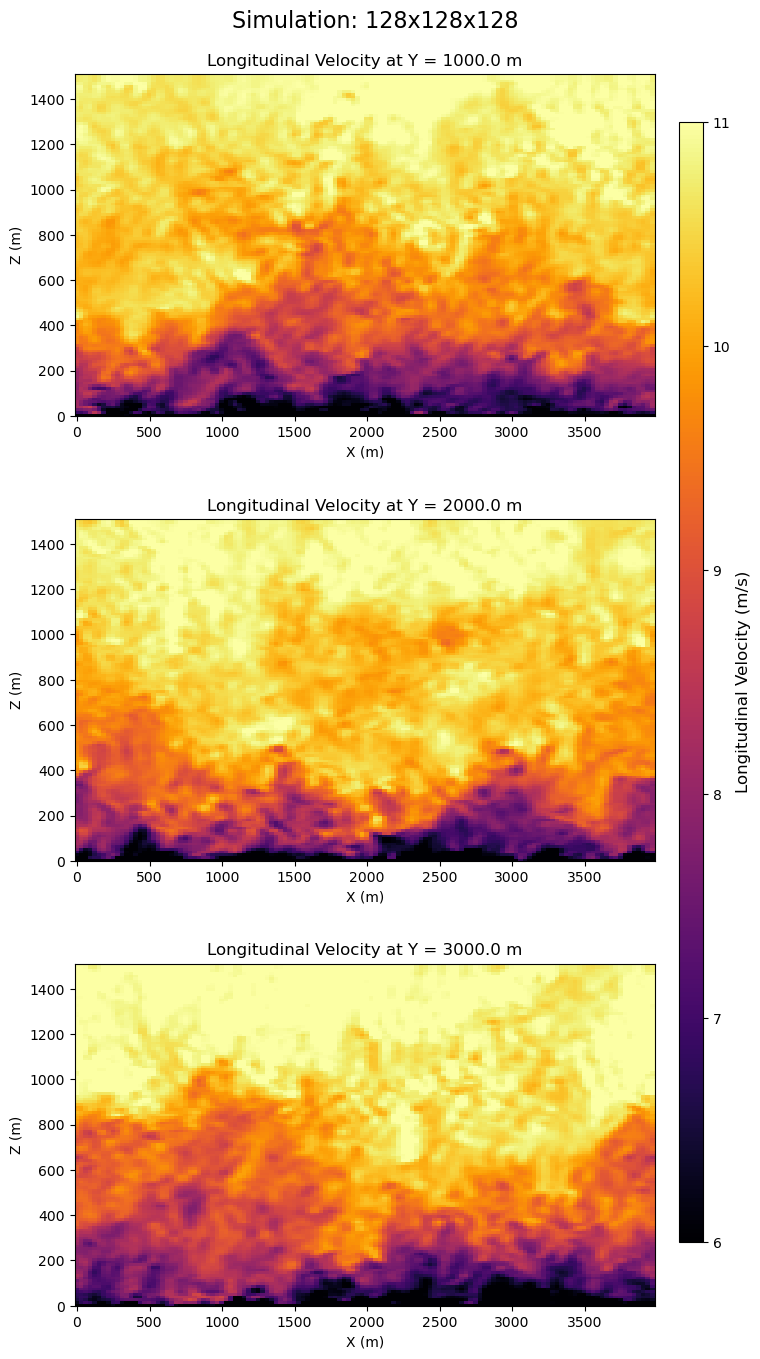

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(8, 16))  

# Selected cross-sections at 0.25*l_y, 0.5*l_y, and 0.75*l_y 
j_levels = [int(ny_2/4), int(ny_2/2), int(ny_2*3/4)]  

# Colorbar range
vmin = 6
vmax = 11

for i, j in enumerate(j_levels):
    im = axes[i].pcolor(x_axis_2, z_u_2, u3D_2[:,j,:].T, cmap='inferno', 
                        vmin=vmin, vmax=vmax)
    axes[i].set_title(f'Longitudinal Velocity at Y = {j * dy_2} m', 
                      fontsize=12)
    axes[i].set_xlabel('X (m)')
    axes[i].set_ylabel('Z (m)')
    axes[i].set_aspect('auto')  

plt.subplots_adjust(hspace=0.3, right=0.85)  

cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])  
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Longitudinal Velocity (m/s)', fontsize=12)

plt.suptitle('Simulation: 128x128x128', fontsize=16, y=0.92)
plt.show()